In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving boston_data.csv to boston_data.csv


In [ ]:
nome_do_arquivo="boston_data.csv"
boston_data= pd.read_csv(nome_do_arquivo)

In [ ]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [ ]:
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


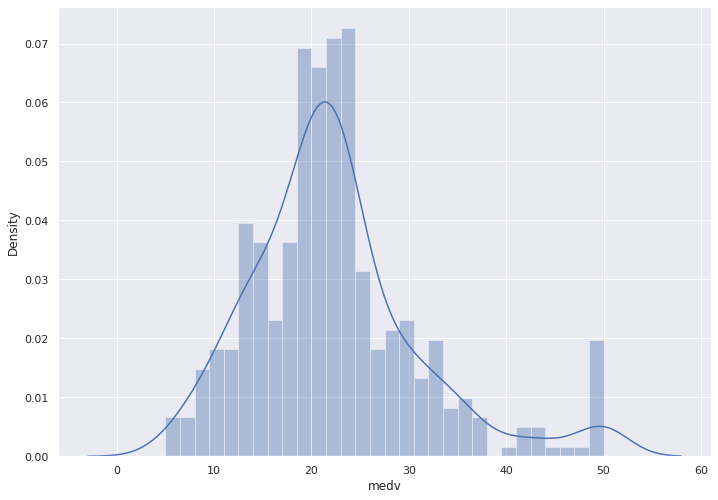

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['medv'], bins=30)
plt.show()

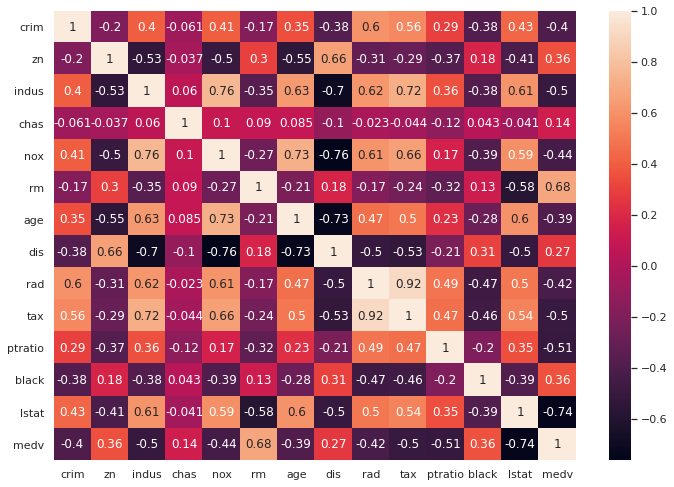

In [ ]:
#Correlation Matrix
corrMatrix = boston_data.corr().round(3)
sns.heatmap(corrMatrix, annot=True)

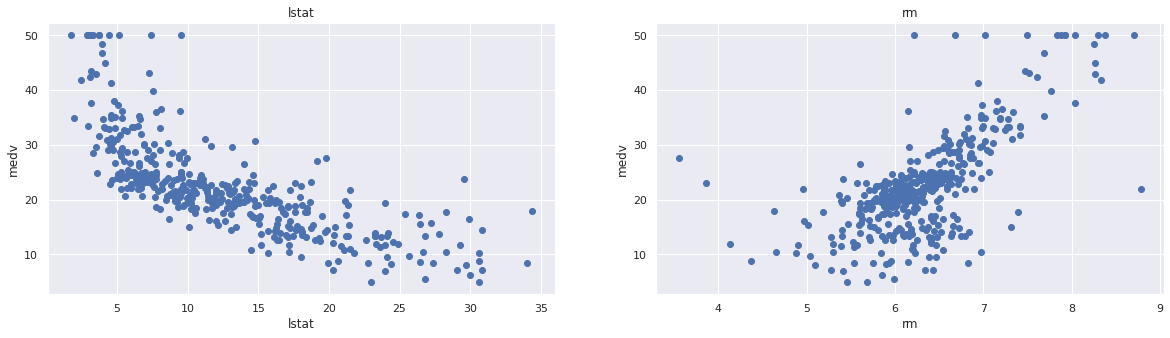

In [ ]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm'] #the two features that shows much higher correlation
target = boston_data['medv'] #our target

for i, col in enumerate(features):  #showing the dispersion
    plt.subplot(1, len(features) , i+1)
    x = boston_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [ ]:
X_train = boston_data[['lstat', 'rm']].values.tolist()
Y_train = boston_data[['medv']].values.tolist()

print(np.shape(X_train))
print(np.shape(Y_train))

(404, 2)
(404, 1)


# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train) #fitting a linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Evaluating


In [ ]:
uploaded_test = files.upload()

Saving boston_test_data.csv to boston_test_data.csv


In [ ]:
nome_do_arquivo="boston_test_data.csv"
boston_test= pd.read_csv(nome_do_arquivo)

In [ ]:
boston_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     102 non-null    float64
 1   zn       102 non-null    float64
 2   indus    102 non-null    float64
 3   chas     102 non-null    float64
 4   nox      102 non-null    float64
 5   rm       102 non-null    float64
 6   age      102 non-null    float64
 7   dis      102 non-null    float64
 8   rad      102 non-null    float64
 9   tax      102 non-null    float64
 10  ptratio  102 non-null    float64
 11  black    102 non-null    float64
 12  lstat    102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


In [ ]:
boston_test.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [ ]:
X_test = boston_test[['lstat', 'rm']].values.tolist()

print(np.shape(X_test))

(102, 2)


In [ ]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Model performance for training")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Answer using Linear Regression to Boston_Test_data
Y_test_pred = linear_model.predict(X_test)


